In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt
%matplotlib inline

# Выбранное распределение - распределение Лапласа

https://ru.wikipedia.org/wiki/Распределение_Лапласа

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.laplace.html#scipy.stats.laplace

Генерация выборки:

In [125]:
# Параметры распределения
ALPHA = 0.5
BETA = 5.

laplace_rv = sts.laplace(loc=BETA, scale=ALPHA)

# сгенерируем 1000 значений
sample = laplace_rv.rvs(size=1000)

#проверка задания распределения
print ('Theoretical mean: ', sample.mean())
print ('Theoretical standard deviation: ', sample.std())

Theoretical mean:  4.98061665834
Theoretical standard deviation:  0.75170258159


### Построим гистограммы выборки и график теоритеческой плотности распределения случайной величины

Text(0,0.5,'pdf')

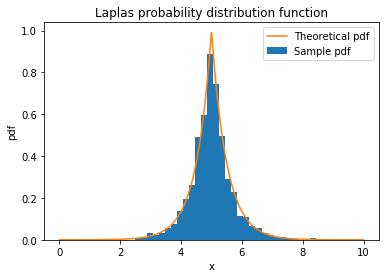

In [105]:
#гистограмма выборки
plt.hist(sample, bins = 30, density=True, label='Sample pdf')

# #теоретическая плотность распределения
x = np.linspace(0,10,1000)
pdf = laplace_rv.pdf(x)
plt.plot(x, pdf, label='Theoretical pdf')
plt.legend()
# plt.grid()
plt.title('Laplas probability distribution function')
plt.xlabel('x')
plt.ylabel('pdf')

### Сгенерируем 1000 выборок объёма n (5, 10, 50) и построим гистограммы распределений их выборочных средних

In [108]:
COUNT_SAMPLES = 1000
SAMPLE_SIZE = [5, 10, 50]

#массив под выборочное среднее значение, заполненный нулями
distributionSamples = np.zeros( (len(SAMPLE_SIZE), COUNT_SAMPLES) )

#вычисление выборочных средних значений и занесение в массив
for i in range( len(SAMPLE_SIZE) ):
    for j in range(COUNT_SAMPLES):
        distributionSampleTemp = np.array( sts.laplace.rvs(loc=BETA, scale=ALPHA, size=SAMPLE_SIZE[i]) )
        distributionSampleTempMean = distributionSampleTemp.mean()
        distributionSamples[i, j] = distributionSampleTempMean
        
print(distributionSamples)

[[ 4.28309748  5.10309306  4.96464121 ...,  4.65568311  5.33604592
   4.71313224]
 [ 4.68054691  5.03834139  5.03702026 ...,  5.57045719  4.96225426
   4.69656608]
 [ 5.03424572  5.08389551  4.95358323 ...,  5.01468312  4.88220601
   4.93504034]]


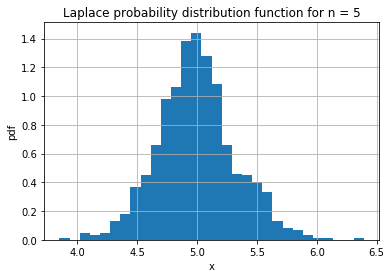

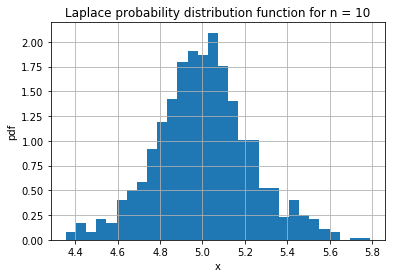

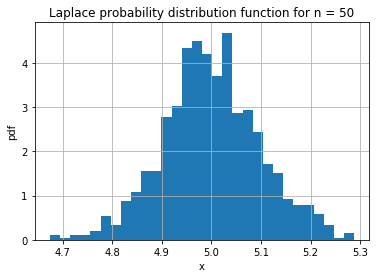

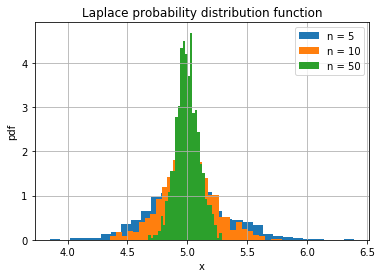

In [109]:
#гистограммы выборки
for i in range( len(SAMPLE_SIZE) ):
    plt.hist(distributionSamples[i], bins=30, density=True)
    plt.grid()
#     plt.axis([2, 8, 0, 2.5])
    plt.title('Laplace probability distribution function for n = ' + str(SAMPLE_SIZE[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    plt.show()
    
for i in range( len(SAMPLE_SIZE) ):
    plt.hist(distributionSamples[i], bins=30, density=True, label='n = ' + str(SAMPLE_SIZE[i]))
    plt.grid()
#     plt.axis([2, 8, 0, 2.5])
    plt.title('Laplace probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')

### Посчитаем значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних

In [116]:
#Математическое ожидание и дисперсия

distributionSampleMean = BETA
distributionSampleVariance = np.zeros( len(SAMPLE_SIZE) )
for i in range( len(SAMPLE_SIZE) ):
    distributionSampleVariance[i] = 2 / ALPHA**2 / SAMPLE_SIZE[i]
    
print ('Математическое ожидание: ' + str(distributionSampleMean))
for i in range( len(SAMPLE_SIZE) ):
    print ('Дисперсия для n =', str(SAMPLE_SIZE[i]) + ' : ' + str(distributionSampleVariance[i]))


Математическое ожидание: 5.0
Дисперсия для n = 5 : 1.6
Дисперсия для n = 10 : 0.8
Дисперсия для n = 50 : 0.16


### Нарисуем плотность соответствующего нормального распределения поверх каждой гистограммы

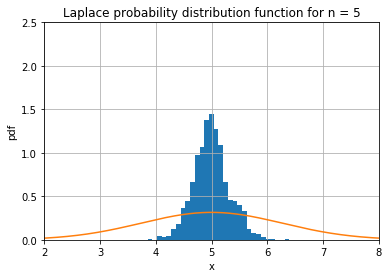

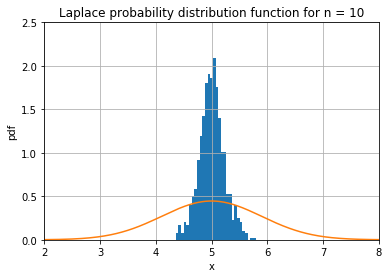

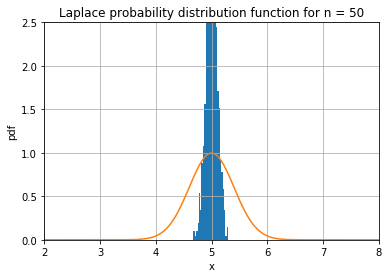

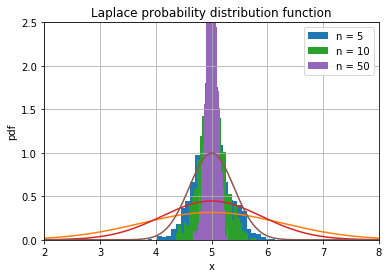

In [124]:
#гистограммы выборки
for i in range( len(SAMPLE_SIZE) ):
    plt.hist(distributionSamples[i], bins=30, density=True)
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('Laplace probability distribution function for n = ' + str(SAMPLE_SIZE[i]))
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    # зададим нормально распределенную случайную величину
    mu = distributionSampleMean
    sigma = sqrt(distributionSampleVariance[i])
    normRv = sts.norm(loc=mu, scale=sigma)    
    x = np.linspace(-10,10,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)
    plt.show()
    
for i in range( len(SAMPLE_SIZE) ):
    plt.hist(distributionSamples[i], bins=30, density=True, label='n = ' + str(SAMPLE_SIZE[i]))
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('Laplace probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('pdf')
    
    # зададим нормально распределенную случайную величину
    mu = distributionSampleMean
    sigma = sqrt(distributionSampleVariance[i])
    normRv = sts.norm(loc=mu, scale=sigma)    
    x = np.linspace(-10,10,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)

## Вывод
Для распределения Лапласа распределение выборочных средних хорошо описывается нормальным распределением, центральная предельная теорема с ним работает.
С ростом размера выборок точность нормальной аппроксимации увеличивается.